In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Set styling
sns.set(style= "ticks")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv('data/train.csv')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

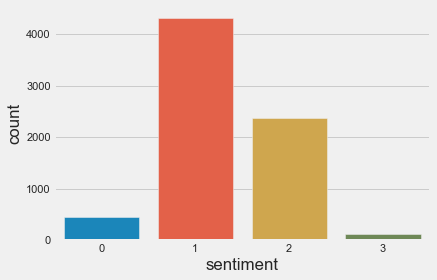

In [3]:
sns.countplot(x=df['sentiment'])

In [4]:
#dimension of the dataset

print("Size of train dataset: ",df.shape)

Size of train dataset:  (7274, 3)


In [5]:
#printing last rows of train dataset
df.tail()

tweet_id                                              tweet  sentiment
7269      3343  @mention Google plze Tammi.  I'm in middle of ...          1
7270      5334  RT @mention ÷¼ Are you all set? ÷_ {link} ÷...          1
7271      5378  RT @mention Aha! Found proof of lactation room...          1
7272      2173  We just launched our iPad app at #SXSW! Get al...          1
7273      3162  The next fin serv battle is vs Apple, GOOG, Mo...          1

In [6]:
df.isnull().sum()

tweet_id     0
tweet        1
sentiment    0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
# Step 4 Cleaning

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
from tqdm import tqdm
stop_words = stopwords.words('english')
port_stem = PorterStemmer()
lemm = WordNetLemmatizer()

# add and remove words from stop_words
stop_words.sort()

words = ['no', 'not'] # remove from stop words
for i in stop_words:
    if i in words:
        stop_words.remove(i)

In [9]:
corpus=[]
for sentance in tqdm(df['tweet'].values):
    sentance = re.sub(r"https?://\S+|www\.\S+", "", sentance)
    sentance = re.sub(r"<.*.?>", "", sentance)
    
    sentance = re.sub(r"["
                      u"\U0001F600-\U0001F64F"  # emoticons
                      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                      u"\U0001F680-\U0001F6FF"  # transport & map symbols
                      u"\U0001F1E0-\U0001F1FF"  # flags (iOS))
                      u"\U00002702-\U000027B0"
                      u"\U000024C2-\U0001F251"
                      "]+", "",sentance , flags = re.UNICODE
                      )
    
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stop_words)
#     sentance = ' '.join(port_stem.stem(word) for word in sentance.split())
    sentance = ' '.join(lemm.lemmatize(word) for word in sentance.split())
    corpus.append(sentance.strip())

df['cleaned_tweet'] = corpus

100%|████████████████████████████████████████████████████████████████████████████| 7273/7273 [00:03<00:00, 2127.35it/s]


In [10]:
# printing some random reviews
random_review = [0, 80, 300, 1500, 2422, 5000]
for i in random_review:
    print(df['tweet'].values[i])
    print("-"*20)
    print(df['cleaned_tweet'].values[i])
    print("-"*50)
    print(f"sentiment: {df['sentiment'].values[i]}")
    print("="*100+'\n\n')

#sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller
--------------------
sxswnui sxsw apple defining language touch different dialect becoming smaller
--------------------------------------------------
sentiment: 1


You spent $1,000+ to come to SXSW. 

You've already used iPad 1. 

The wait is a couple city blocks. 

Why? #ipad2 #SXSW {link}
--------------------
spent come sxsw already used ipad wait couple city block sxsw link
--------------------------------------------------
sentiment: 0


Only white #ipad2 64gig wifi available at #Austin #SXSW #Apple popup store right now, but no wait!
--------------------
white wifi available austin sxsw apple popup store right no wait
--------------------------------------------------
sentiment: 2


@mention check into some of the new chatting/texting startups that are coming out of #SXSW {link} (re:iphone chat client)
--------------------
mention check new chatting texting startup coming sxsw link iphone ch

In [11]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words

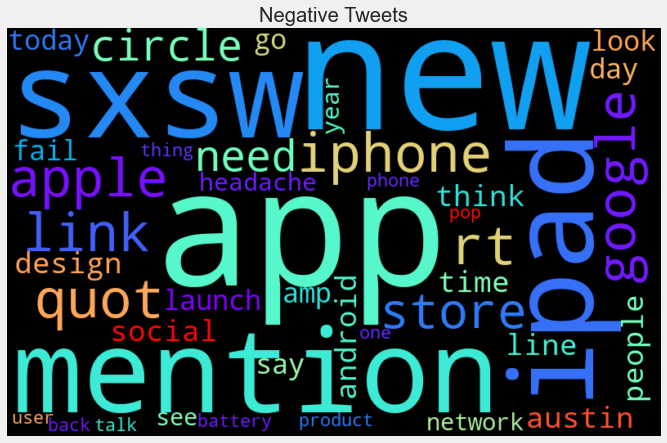

In [12]:
corpus = get_corpus(df[df['sentiment']==0]['cleaned_tweet'])

from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(50)
most_common = dict(most_common)
most_common

top_negative_tweet_word = [' '.join([x for x in most_common.keys()])]
top_negative_tweet_word

temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common.keys())
temp["Count"] = list(most_common.values())

fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words', template='presentation')
fig.show()

# Word Cloud
from wordcloud import WordCloud
pos_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=200,\
                          colormap='rainbow').generate(top_negative_tweet_word[0])

plt.figure(figsize=(15, 7))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.title("Negative Tweets")
plt.axis('off')
plt.show()

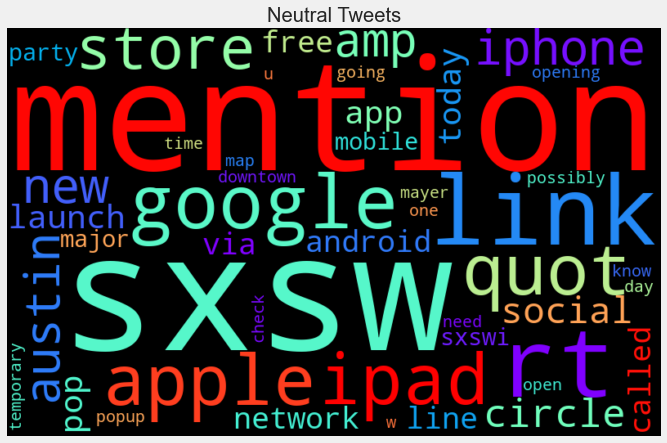

In [13]:

corpus = get_corpus(df[df['sentiment']==1]['cleaned_tweet'])

from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(50)
most_common = dict(most_common)
most_common

top_negative_tweet_word = [' '.join([x for x in most_common.keys()])]
top_negative_tweet_word

temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common.keys())
temp["Count"] = list(most_common.values())

fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words', template='presentation')
fig.show()

# Word Cloud
from wordcloud import WordCloud
pos_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=200,\
                          colormap='rainbow').generate(top_negative_tweet_word[0])

plt.figure(figsize=(15, 7))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.title("Neutral Tweets")
plt.axis('off')
plt.show()

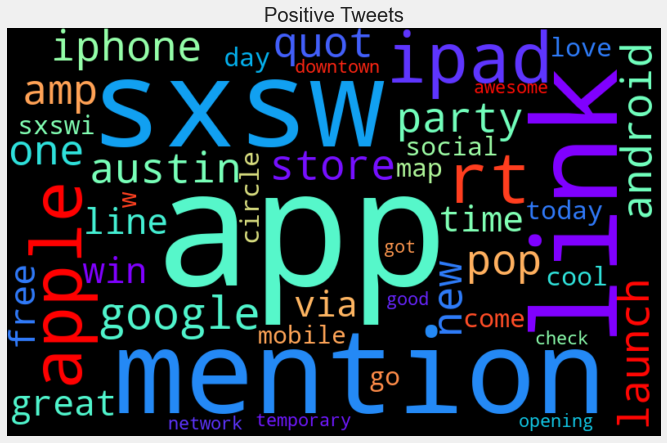

In [14]:
corpus = get_corpus(df[df['sentiment']==2]['cleaned_tweet'])

from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(50)
most_common = dict(most_common)
most_common

top_negative_tweet_word = [' '.join([x for x in most_common.keys()])]
top_negative_tweet_word

temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common.keys())
temp["Count"] = list(most_common.values())

fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words', template='presentation')
fig.show()

# Word Cloud
from wordcloud import WordCloud
pos_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=200,\
                          colormap='rainbow').generate(top_negative_tweet_word[0])

plt.figure(figsize=(15, 7))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.title("Positive Tweets")
plt.axis('off')
plt.show()

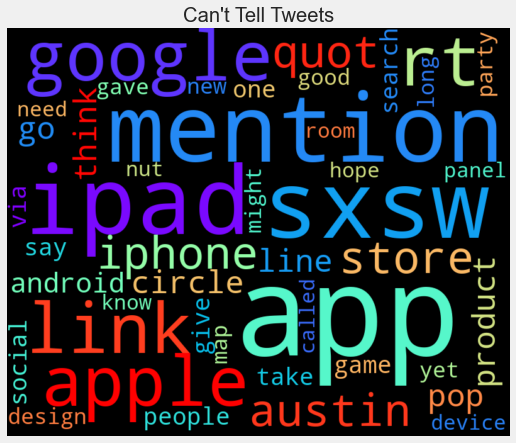

In [15]:
corpus = get_corpus(df[df['sentiment']==3]['cleaned_tweet'])

from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(50)
most_common = dict(most_common)
most_common

top_negative_tweet_word = [' '.join([x for x in most_common.keys()])]
top_negative_tweet_word

temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common.keys())
temp["Count"] = list(most_common.values())

fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words', template='presentation')
fig.show()

# Word Cloud
from wordcloud import WordCloud
pos_wordcloud = WordCloud(width=800, height=650, random_state=21, max_font_size=200,\
                          colormap='rainbow').generate(top_negative_tweet_word[0])

plt.figure(figsize=(15, 7))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.title("Can't Tell Tweets")
plt.axis('off')
plt.show()

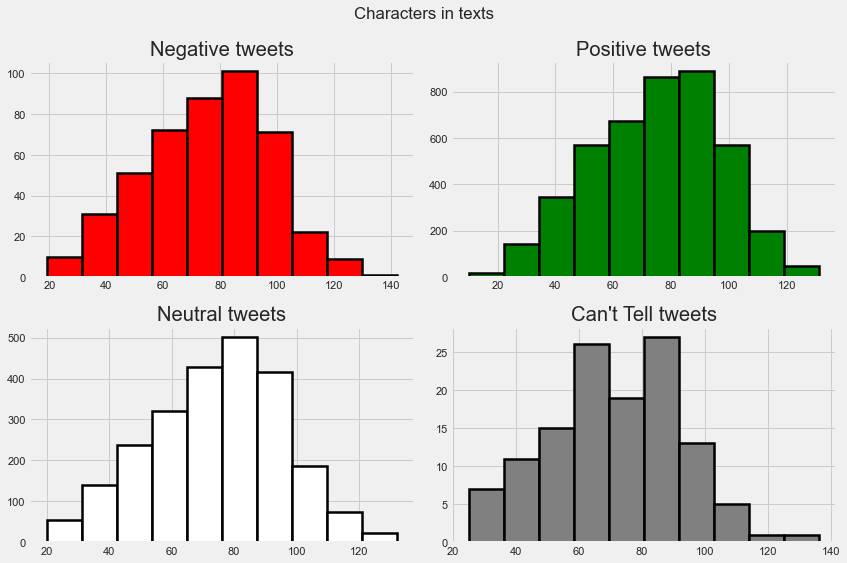

In [16]:
fig,((ax1, ax2), (ax3, ax4))=plt.subplots(2,2,figsize=(12,8))
text_len_0=df[df['sentiment']==0]['cleaned_tweet'].str.len()
ax1.hist(x=text_len_0, color='red', lw=2.5, edgecolor='black')
ax1.set_title('Negative tweets')

text_len_1=df[df['sentiment']==1]['cleaned_tweet'].str.len()
ax2.hist(x=text_len_1, color='green', lw=2.5, edgecolor='black')
ax2.set_title('Positive tweets')

text_len_2=df[df['sentiment']==2]['cleaned_tweet'].str.len()
ax3.hist(x=text_len_2, color='white', lw=2.5, edgecolor='black')
ax3.set_title('Neutral tweets')

text_len_3=df[df['sentiment']==3]['cleaned_tweet'].str.len()
ax4.hist(x=text_len_3, color='gray', lw=2.5, edgecolor='black')
ax4.set_title("Can't Tell tweets")

fig.suptitle('Characters in texts')
plt.tight_layout()
plt.show()

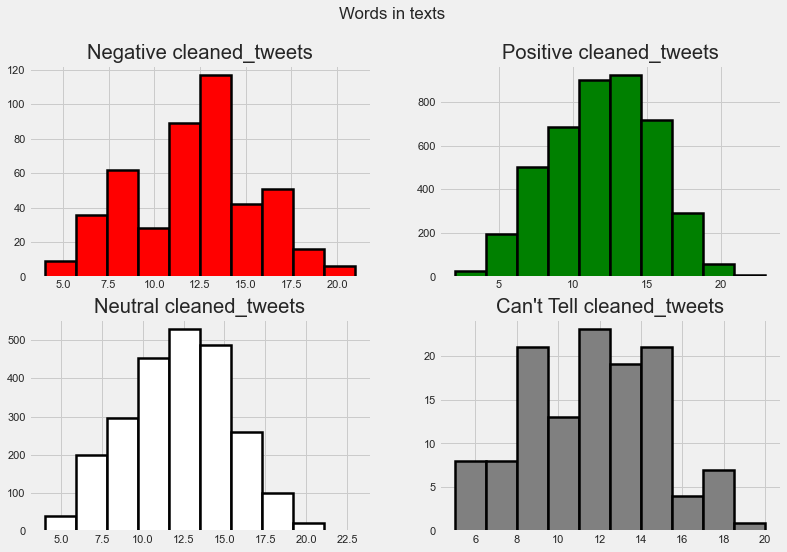

In [17]:
fig,((ax1, ax2), (ax3, ax4))=plt.subplots(2,2,figsize=(12,8))

text_len=df[df['sentiment']==0]['cleaned_tweet'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red', lw=2.5, edgecolor='black')
ax1.set_title('Negative cleaned_tweets')

text_len=df[df['sentiment']==1]['cleaned_tweet'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green', lw=2.5, edgecolor='black')
ax2.set_title('Positive cleaned_tweets')

text_len=df[df['sentiment']==2]['cleaned_tweet'].str.split().map(lambda x: len(x))
ax3.hist(text_len,color='white', lw=2.5, edgecolor='black')
ax3.set_title('Neutral cleaned_tweets')

text_len=df[df['sentiment']==3]['cleaned_tweet'].str.split().map(lambda x: len(x))
ax4.hist(text_len,color='gray', lw=2.5, edgecolor='black')
ax4.set_title("Can't Tell cleaned_tweets")

fig.suptitle('Words in texts')
plt.show()

C:\Users\sanket\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\sanket\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\sanket\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\sanket\anaconda3\lib\site

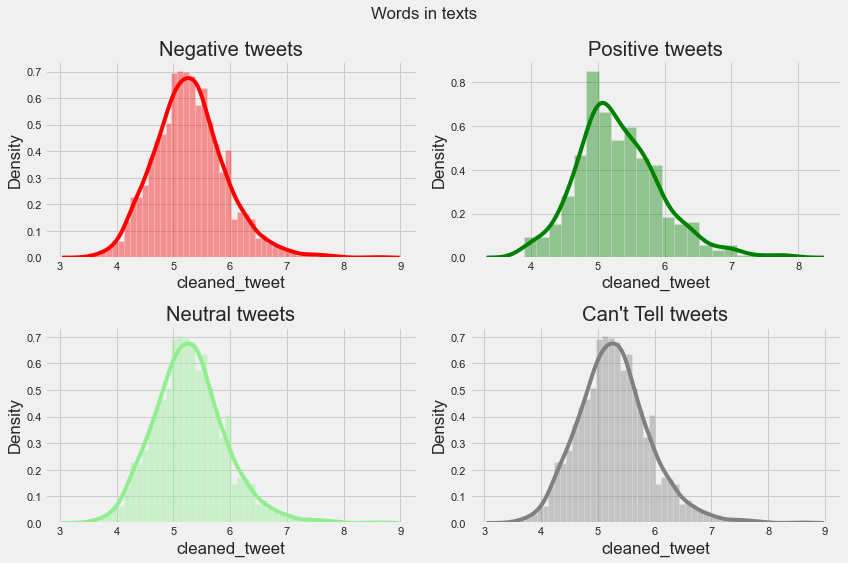

In [18]:
fig,((ax1, ax2), (ax3, ax4))=plt.subplots(2,2,figsize=(12,8))
word=df[df['sentiment']==1]['cleaned_tweet'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1, color='red',)
ax1.set_title('Negative tweets')

word=df[df['sentiment']==0]['cleaned_tweet'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax2, color='green')
ax2.set_title('Positive tweets')


word=df[df['sentiment']==1]['cleaned_tweet'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax3, color='lightgreen')
ax3.set_title('Neutral tweets')

word=df[df['sentiment']==1]['cleaned_tweet'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax4, color='gray')
ax4.set_title("Can't Tell tweets")

fig.suptitle('Words in texts')
plt.tight_layout()
plt.show()

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [20]:
most_common_uni = get_top_text_ngrams(df['cleaned_tweet'],20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words', template='plotly_dark')
fig.show()

In [21]:
most_common_bi = get_top_text_ngrams(df['cleaned_tweet'],20,2)
most_common_bi = dict(most_common_bi)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_bi.keys())
temp["Count"] = list(most_common_bi.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Bigrams in Text', orientation='h', 
             width=700, height=700,color='Common_words', template='plotly_dark')
fig.show()

In [22]:
most_common_tri = get_top_text_ngrams(df['cleaned_tweet'],20,3)
most_common_tri = dict(most_common_tri)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_tri.keys())
temp["Count"] = list(most_common_tri.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Trigrams in Text', orientation='h', 
             width=700, height=700,color='Common_words', template='plotly_dark')
fig.show()